**IMPORTING HEADERS**

In [74]:
pip install scikit-plot

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

**PRE-PROCESSING DATA**

In [76]:
def preprocess(X,y,te_size,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te


**TESTER FUNCTION**

In [77]:
def tester(classi,X_t,y_t,y_p):

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Preformance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

    plot_confusion_matrix(classi,X_t,y_t)
    plt.title('Heat map for confusion matrix')
    plt.show()

    y_p_proba = classifier.predict_proba(X_t)

    skplt.metrics.plot_roc(y_t,y_p_proba)
    plt.show()

 **WORKING ON WINE DATASET**

---



**IMPORTING WINE DATASET**

In [78]:
df1 = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df1 = df1[df1[6]!='?']
df1.shape
X = df1.iloc[:,1:-1]
y = df1[10]
y = y.replace(2,0)
y = y.replace(4,1)

WITHOUT PARAMETER TUNING

---



FOR 70:30 SPLIT

In [79]:
X_train,X_test,y_train,y_test = preprocess(X,y,0.3,scale=True,pca=True)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

SVC Linear:
Confusion Matrix
[[135   0]
 [  3  67]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       135
           1       1.00      0.96      0.98        70

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.9853658536585366


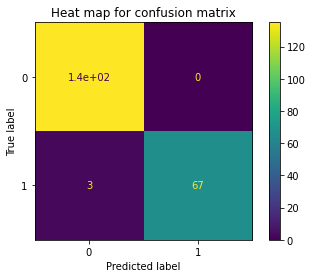

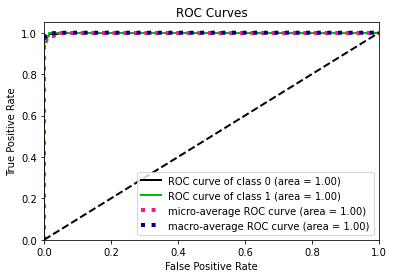

SVC Polynomial degree 2:
Confusion Matrix
[[132   3]
 [ 10  60]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       135
           1       0.95      0.86      0.90        70

    accuracy                           0.94       205
   macro avg       0.94      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.9365853658536586


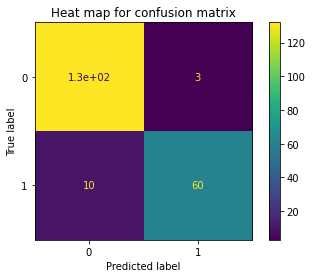

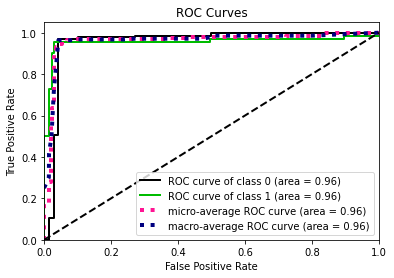

SVC Polynomial degree 3:
Confusion Matrix
[[135   0]
 [  6  64]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       135
           1       1.00      0.91      0.96        70

    accuracy                           0.97       205
   macro avg       0.98      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.9707317073170731


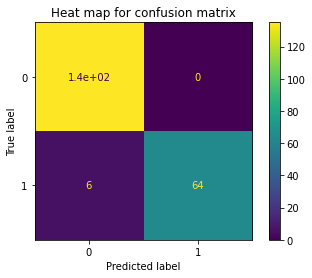

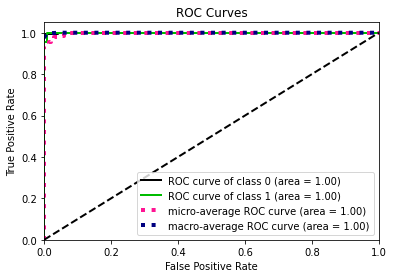

SVC Gaussian:
Confusion Matrix
[[132   3]
 [  2  68]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       135
           1       0.96      0.97      0.96        70

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.975609756097561


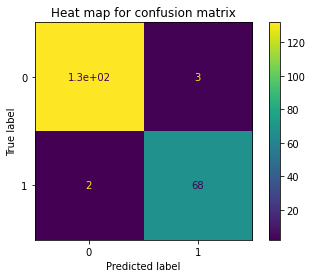

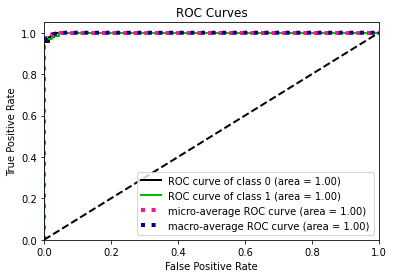

SVC Sigmoid:
Confusion Matrix
[[133   2]
 [  3  67]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       135
           1       0.97      0.96      0.96        70

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.975609756097561


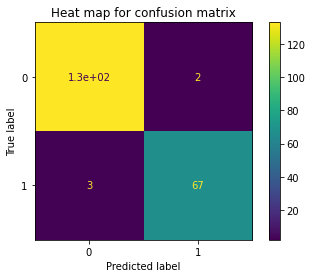

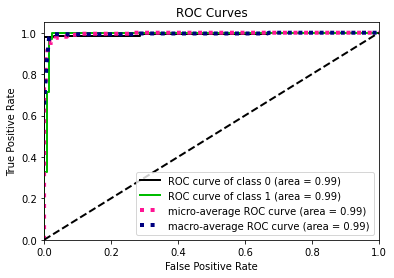

MLP:
Confusion Matrix
[[133   2]
 [  3  67]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       135
           1       0.97      0.96      0.96        70

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205

-----------------------------------
-----------------------------------
Accuracy Score:
0.975609756097561


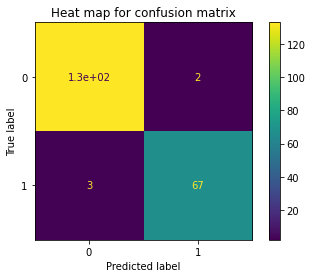

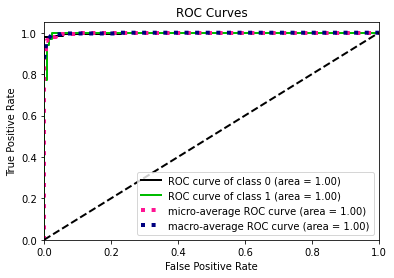

Random Forest Classifier:
Confusion Matrix
[[135   0]
 [  0  70]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        70

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

-----------------------------------
-----------------------------------
Accuracy Score:
1.0


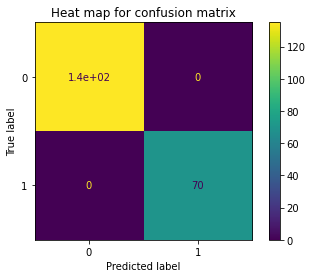

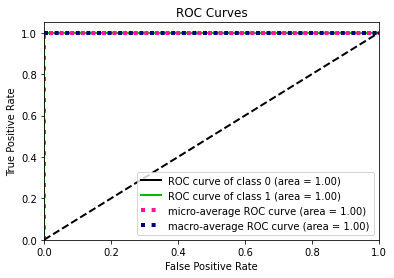

In [80]:
#SVM linear model
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('SVC Linear:')
tester(classifier,X_test,y_test,y_pred)

#SVM polynomial model degree 2
classifier = SVC(kernel='poly', degree=2, probability=True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('SVC Polynomial degree 2:')
tester(classifier,X_test,y_test,y_pred)

#SVM polynomial model degree 3
classifier = SVC(kernel='poly', degree=3, probability=True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('SVC Polynomial degree 3:')
tester(classifier,X_test,y_test,y_pred)

#SVM gaussian model
classifier = SVC(kernel='rbf', probability=True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('SVC Gaussian:')
tester(classifier,X_test,y_test,y_pred)

#SVM sigmoid model
classifier = SVC(kernel='sigmoid', probability=True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('SVC Sigmoid:')
tester(classifier,X_test,y_test,y_pred)

#mlp model
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=500)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('MLP:')
tester(classifier,X_test,y_test,y_pred)

#random forest model
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('Random Forest Classifier:')
tester(classifier,X_test,y_test,y_pred)

WITH PARAMETER TUNING

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

In [82]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,140,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [83]:
#Random Forest Parameter Tuning

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

The best parameters are {'max_features': 5, 'n_estimators': 50} with a score of 0.96
